In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
#import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.metrics import precision_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.feature_selection import VarianceThreshold


### Область работы 2 (выполнение лучшей модели)

In [3]:
path_train = 'train_house_A.csv' 
path_test='test_house_A.csv'
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_test.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [4]:
# imputer = SimpleImputer(strategy='median',missing_values=np.nan)
# column_to_impute = ['cat_bin']
# df_test[column_to_impute] = imputer.fit_transform(df_test[column_to_impute])

In [5]:
df_test.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [6]:
df_train.drop(['0', '11', '13', '15', '2', '21', '22', '23', '27', '3', '8'],axis=1,inplace=True)

In [7]:
df_train.drop(['14', '17', '18', '19'],axis=1,inplace=True)
df_train.drop(['5','25','26','5','28'],axis=1,inplace=True)


In [8]:
df_test.drop(['0', '11', '13', '15', '2', '21', '22', '23', '27', '3', '8'],axis=1,inplace=True)

In [9]:
df_test.drop(['14', '17', '18', '19'],axis=1,inplace=True)
df_test.drop(['5','25','26','5','28'],axis=1,inplace=True)


In [10]:
df_test

,1,4,6,7,9,10,12,16,20,24
0,0.0,-0.223185,0.488647,-0.570187,2.149083,1.552470,2.532024,1.472618,-0.263991,-0.554035
1,0.0,1.472449,0.391790,3.413810,2.149083,-0.024866,0.224410,-0.679063,3.846729,-0.554035
2,0.0,-0.223185,-1.303204,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035
3,0.0,-0.223185,1.169412,-0.570187,2.149083,-1.536561,-0.929397,-0.679063,-0.263991,-0.554035
4,0.0,-0.223185,-0.486840,-0.570187,-0.465315,0.222511,-0.929397,-0.679063,-0.263991,-0.554035
...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.624632,0.391790,1.421812,-0.465315,1.346730,2.532024,1.472618,1.791369,-0.554035
133,0.0,-0.223185,-0.341555,-0.570187,-0.465315,0.068207,-0.929397,-0.679063,-0.263991,-0.554035
134,0.0,-0.223185,0.336443,-0.570187,-0.465315,-0.651881,-0.929397,-0.679063,-0.263991,-0.554035
135,0.0,-0.223185,-0.300045,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035


In [11]:
df_target=df_train['price']
df_data=df_train.drop('price', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, random_state=53)

In [13]:
# Блок(и) обучения и поверки модели

In [14]:
mode =  Pipeline([
            ('preprocessing', StandardScaler()), 
            ('regressor',     KNeighborsRegressor(n_neighbors=20, p=1)) #пока эта модель из кнн самая лучшая
            ])
mode.fit(X_train, y_train)
knn_pr = mode.predict(X_test)

In [15]:
# Блок предсказания с использованием тестового набора

In [16]:
prediction = mode.predict(df_test)

In [17]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = prediction

In [18]:
y_predict

array([6423900. , 4983300. , 3343900. , 4952850. , 3740100. , 3740100. ,
       7698047. , 6752900. , 3626875. , 5988150. , 5712350. , 4615100. ,
       4117750. , 3705100. , 3460100. , 7274547. , 3672550. , 5002725. ,
       4674425. , 5619250. , 3540250. , 4480000. , 5712350. , 3362100. ,
       3460100. , 3965150. , 5192775. , 3593100. , 3246600. , 3834250. ,
       3233650. , 6067747. , 4683175. , 3963750. , 4577650. , 3316600. ,
       3356500. , 2617807.5, 4363800. , 4946550. , 6423900. , 3741500. ,
       6411447. , 5069925. , 3689000. , 5724600. , 4919425. , 3895325. ,
       4577650. , 2772700. , 4710300. , 2637057.5, 6103797. , 4600400. ,
       3540250. , 4500650. , 5070800. , 3973900. , 3105007.5, 5778150. ,
       6156150. , 3707200. , 2772700. , 3973900. , 5919900. , 5741400. ,
       3739750. , 3423350. , 3460100. , 6752900. , 3423350. , 4714150. ,
       3460100. , 5751900. , 4716075. , 3973900. , 5421500. , 6926297. ,
       5220250. , 4676000. , 4404575. , 6064100. , 

In [19]:
column_names = df_test.columns.tolist()
print(column_names)

['1', '4', '6', '7', '9', '10', '12', '16', '20', '24']


(137,) (137,)
Отрицательные цены -  0
Max Error: 6,436,703
 
----------------------
   MAPE Error: 18.86
----------------------


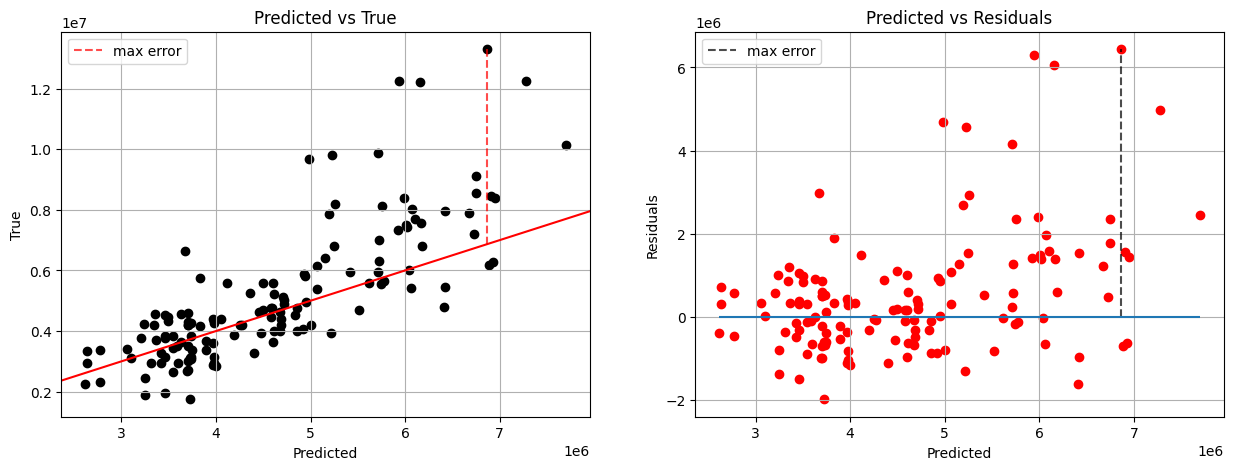

In [20]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [21]:
mask = column_names

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
